<a href="https://colab.research.google.com/github/Rashmisharma0101/Plots---Line-Bar-Pieplots/blob/master/Tensorflow_classifier_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [ ]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
# in classification, always check if the data is balanced or not

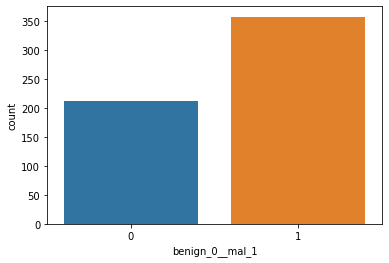

In [ ]:
sns.countplot(df['benign_0__mal_1'])

In [ ]:
#this is relatively balanced only, not  that skewed

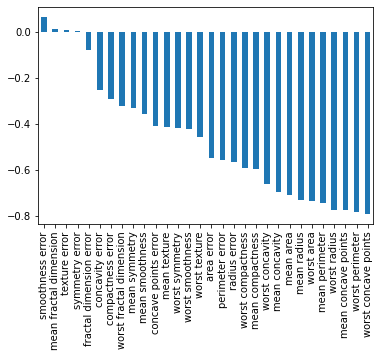

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending = False).plot(kind = 'bar') #[:-1] for dropping the column itself, not needed for correlation

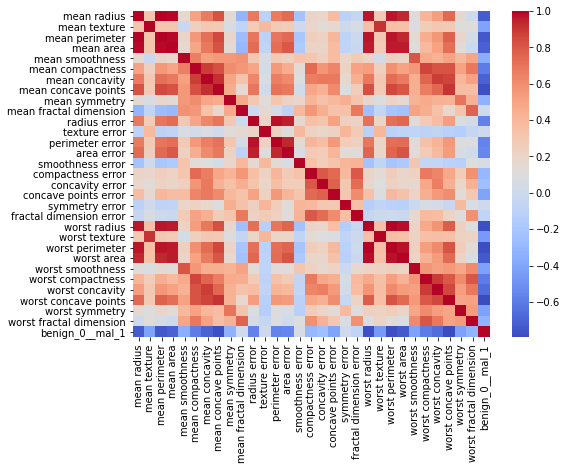

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [ ]:
# do a train_test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 101, test_size = 0.3)

In [ ]:
#scaling  data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  #not fitting the test data  to prevent data leakage

In [ ]:
# create model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(398, 30)

In [ ]:
model = Sequential()
model.add(Dense(30, activation ='relu'))
model.add(Dense(15, activation ='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation ='sigmoid'))


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
13/13 [==============================] - 0s 15ms/step - loss: 0.7728 - val_loss: 0.7334
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6972 - val_loss: 0.6837
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6589 - val_loss: 0.6489
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.6173
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5836 - val_loss: 0.5794
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5424 - val_loss: 0.5417
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5035 - val_loss: 0.5012
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4633 - val_loss: 0.4614
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4238 - val_loss: 0.4239
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3869 - val_loss: 0.3874
Epoch 11

In [ ]:
df2 = pd.DataFrame(model.history.history)

In [ ]:
df2

,loss,val_loss
0,0.772770,0.733377
1,0.697160,0.683739
2,0.658932,0.648895
3,0.622093,0.617267
4,0.583572,0.579386
...,...,...
595,0.001954,0.373924
596,0.001883,0.374645
597,0.001884,0.374849
598,0.002190,0.378567


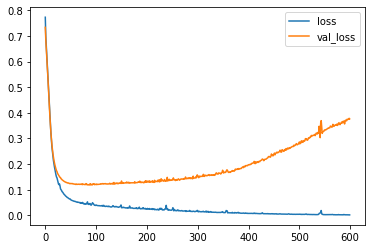

In [ ]:
df2.plot()

In [ ]:
#perfect example of overfitting

In [ ]:
#use early stopping

In [ ]:
model = Sequential()
model.add(Dense(30, activation ='relu'))
model.add(Dense(15, activation ='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 25)

In [ ]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6607 - val_loss: 0.6455
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6246 - val_loss: 0.6114
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.5680
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5349 - val_loss: 0.5156
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4800 - val_loss: 0.4651
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4278 - val_loss: 0.4174
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3823 - val_loss: 0.3778
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3479 - val_loss: 0.3405
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3133 - val_loss: 0.3088
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2818 - val_loss: 0.2808
Epoch 11/

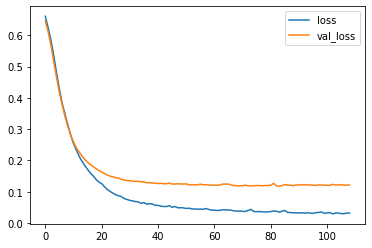

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
  #add dropout layers to prevent overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(30, activation ='relu'))
model.add(Dropout(0.5)) #we want to drop half (random) the batch of neurons out of 30
model.add(Dense(15, activation ='relu'))
model.add(Dense(15, activation ='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.7062 - val_loss: 0.6792
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6775 - val_loss: 0.6627
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6645 - val_loss: 0.6435
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6553 - val_loss: 0.6165
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6385 - val_loss: 0.5887
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6041 - val_loss: 0.5476
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5494 - val_loss: 0.4928
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5196 - val_loss: 0.4336
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4826 - val_loss: 0.3839
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4372 - val_loss: 0.3405
Epoch 11

In [ ]:
#running more epochs as we have added dropout layers

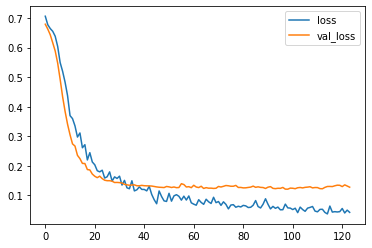

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
pred = pd.DataFrame(model.predict_classes(X_test), y_test)

In [ ]:
pred.head()

,0
1,1
1,1
1,1
0,0
1,1


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
print(confusion_matrix(y_test, pred))

[[ 63   3]
 [  2 103]]


In [ ]:
#DONE